In [59]:
import numpy as np
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from collections import Counter
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import datetime 

In [27]:
def load_data(set_type, test_size=0.3):
    if   set_type == 'Binary_XOR':
        dataset = np.loadtxt('Datasets\KSPCA\Binary_XOR.txt', delimiter = ',', dtype='str') 
        n = 2
    elif set_type == 'Concentric_rectangles':
        dataset = np.loadtxt('Datasets\KSPCA\Concentric_rectangles.txt', delimiter = ',', dtype='str')
        n = 2
    elif set_type == 'Concentric_rings':
        dataset = np.loadtxt('Datasets\KSPCA\Concentric_rings.txt', delimiter = ',', dtype='str')
        n = 2
    elif set_type == 'Twomoons':
        dataset = np.loadtxt('Datasets\KSPCA\Twomoons.txt', delimiter = ',', dtype='str')
        n = 2
        
    x = dataset[:,:n].astype(np.float)
    y = dataset[:,n].astype(np.int)
    
    y_unique = np.unique(y)
    k = len(np.unique(y))
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    
    m = X_train.shape[0]
    m_test = X_test.shape[0]
    return X_train, y_train, m, X_test, y_test, m_test, k, n, y_unique

In [28]:
def print_dataset_specification(dataset, X_train, y_train, m, X_test, y_test, m_test, c, n, y_unique):
    print('---------------------------DataSet : '+ dataset +'---------------------------')
    print('x_train.shape =',X_train.shape)
    print('y_train.shape =',y_train.shape)
    print('m =',m)
    print('n =',n)
    print('x_test.shape =',X_test.shape)
    print('y_test.shape =',y_test.shape)
    print('m_test =',m_test)
    print('c =',c)
    print('y_unique =',y_unique)   

In [152]:
def plot_scatter(x_train, y_train, x_test, y_test, zx_train, zy_train, zx_test, zy_test, dataset, Sigma):
    fig = plt.figure(figsize=(15, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2') 
    ax1.set_title(dataset + ' : Orginal Space')
    ax1.scatter(x_train[:,0], x_train[:,1], c=y_train, s = 50, marker='o', alpha=0.5, label = 'X Train')    
    ax1.scatter(x_test[:,0], x_test[:,1], c=y_test, s = 50, marker='x', alpha=0.5, label = 'X Test')
    ax1.legend() 
    
    ax2.set_xlabel('z1')
    ax2.set_ylabel('z2') 
    ax2.set_title(dataset + ' : Projection Space (Sigma='+str(Sigma)+')')
    ax2.scatter(zx_train[:,0], zx_train[:,1], c=zy_train, s = 50, marker='o', alpha=0.5, label = 'Z Train')    
    ax2.scatter(zx_test[:,0], zx_test[:,1], c=zy_test, s = 50, marker='x', alpha=0.5, label = 'Z Test')
    ax2.legend()
    
    plt.show()

In [153]:
def kspca(x_train, y_train, x_test, y_test, sigma):
    n = x_train.shape[0] #training samples numbers 140
    n_test = x_test.shape[0] #test samples numbers 60
    p = x_train.shape[1] #feature numbers 2
    X = x_train.T
    Y = y_train
    I = np.identity(n)
    e = np.ones((n,1))
    
    L = np.zeros((n,n))    
    for i in range(0, n):
        for j in range(0, n):
            if Y[i]==Y[j]:
                L[i,j] = 1
    
    K = np.zeros((n,n))
    for i in range(0, n):
        for j in range(0, n):
            K[i,j] = np.exp(-(np.linalg.norm(x_train[i]-x_train[j], ord=2) / (2*(sigma**2))))
    #print('K.shape =',K.shape)
                            
    K_test = np.zeros((n,n_test))
    for i in range(0, n):
        for j in range(0, n_test):
            K_test[i,j] = np.exp(-(np.linalg.norm(x_train[i]-x_test[j], ord=2) / (2*(sigma**2))))
    #print('K_test.shape =',K_test.shape)
                                 
    H = I-(1/n)*(e@e.T)
    Q = K@H@L@H@K
                                 
    val, vec = sp.linalg.eigh(Q, K)
    Beta = vec[:,-2:]
    #print('Beta.shape =',Beta.shape)
    #print('Beta =',Beta)
                                 
    Z = Beta.T@K
    z = Beta.T@K_test
    
    return Z.T, z.T

In [171]:
# datasets = [['Binary_XOR',1.0],['Concentric_rectangles',0.1],['Concentric_rings',0.1],['Twomoons',0.3]]
datasets = [['Binary_XOR',0.1],['Binary_XOR',0.2],['Binary_XOR',0.3],['Binary_XOR',0.4],['Binary_XOR',0.5],['Binary_XOR',0.6],['Binary_XOR',0.7],['Binary_XOR',0.8],['Binary_XOR',0.9],['Binary_XOR',1.0],
            ['Concentric_rectangles',0.1],['Concentric_rectangles',0.2],['Concentric_rectangles',0.3],['Concentric_rectangles',0.4],['Concentric_rectangles',0.5],['Concentric_rectangles',0.6],['Concentric_rectangles',0.7],['Concentric_rectangles',0.8],['Concentric_rectangles',0.9],['Concentric_rectangles',1.0],
            ['Concentric_rings',0.1],['Concentric_rings',0.2],['Concentric_rings',0.3],['Concentric_rings',0.4],['Concentric_rings',0.5],['Concentric_rings',0.6],['Concentric_rings',0.7],['Concentric_rings',0.8],['Concentric_rings',0.9],['Concentric_rings',1.0],
            ['Twomoons',0.1],['Twomoons',0.2],['Twomoons',0.3],['Twomoons',0.4],['Twomoons',0.5],['Twomoons',0.6],['Twomoons',0.7],['Twomoons',0.8],['Twomoons',0.9],['Twomoons',1.0]]

---------------------------DataSet : Binary_XOR---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [1 2]


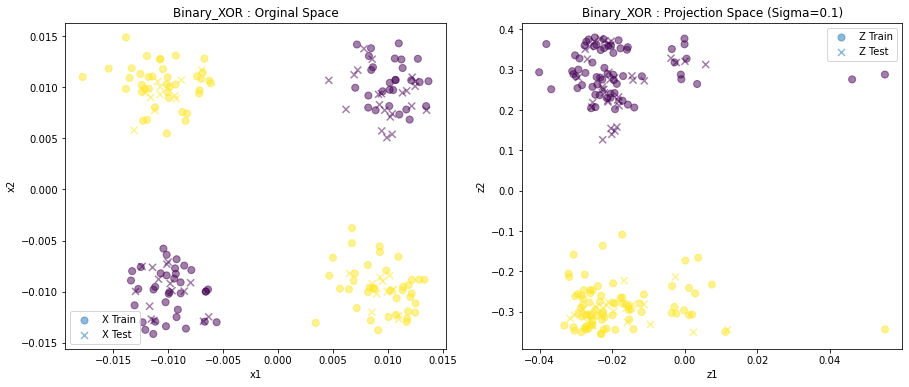

-----------------------------------------------------------------------------

---------------------------DataSet : Binary_XOR---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [1 2]


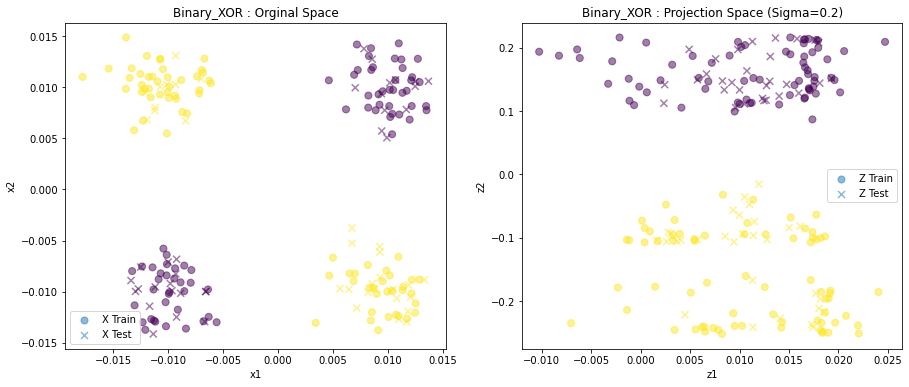

-----------------------------------------------------------------------------

---------------------------DataSet : Binary_XOR---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [1 2]


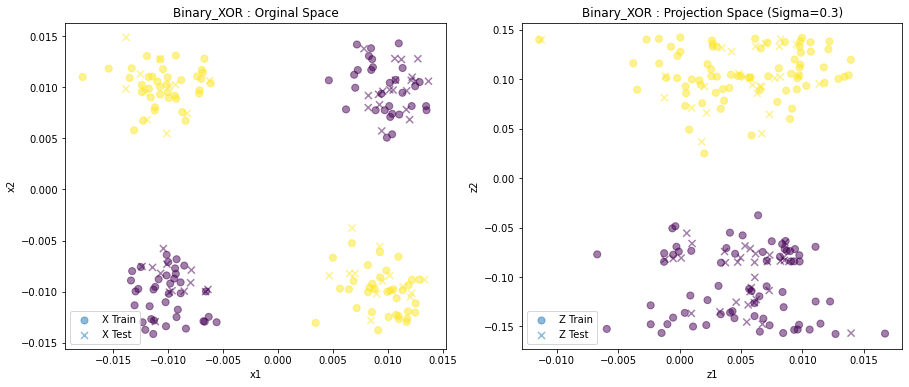

-----------------------------------------------------------------------------

---------------------------DataSet : Binary_XOR---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [1 2]


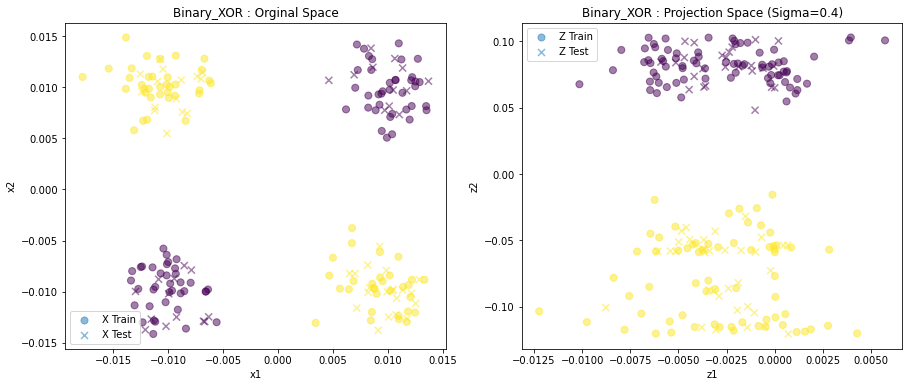

-----------------------------------------------------------------------------

---------------------------DataSet : Binary_XOR---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [1 2]


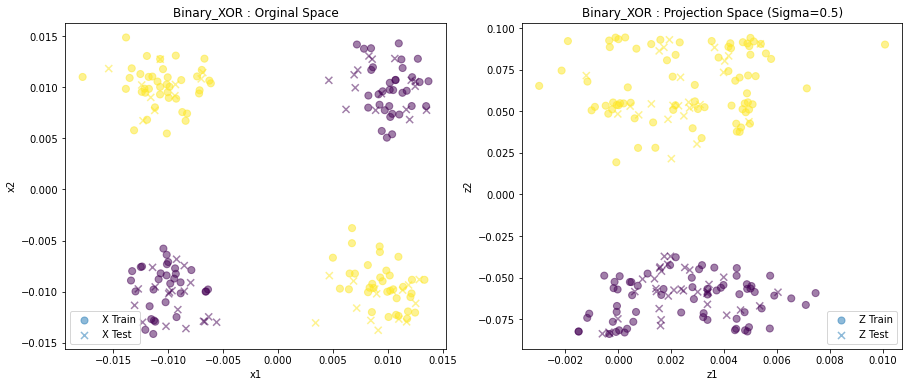

-----------------------------------------------------------------------------

---------------------------DataSet : Binary_XOR---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [1 2]


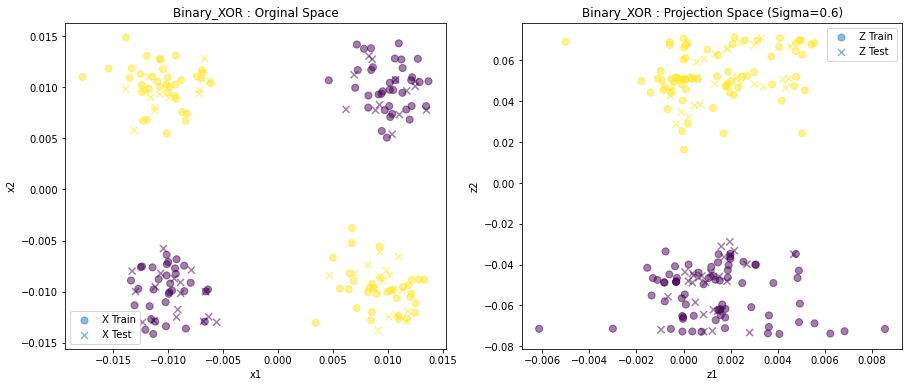

-----------------------------------------------------------------------------

---------------------------DataSet : Binary_XOR---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [1 2]


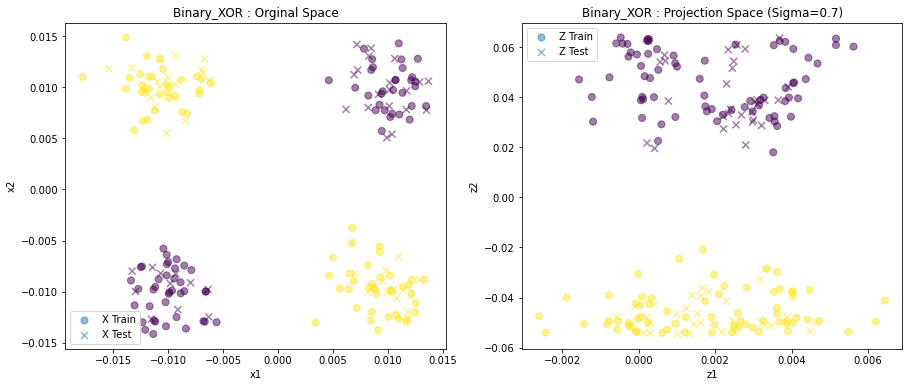

-----------------------------------------------------------------------------

---------------------------DataSet : Binary_XOR---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [1 2]


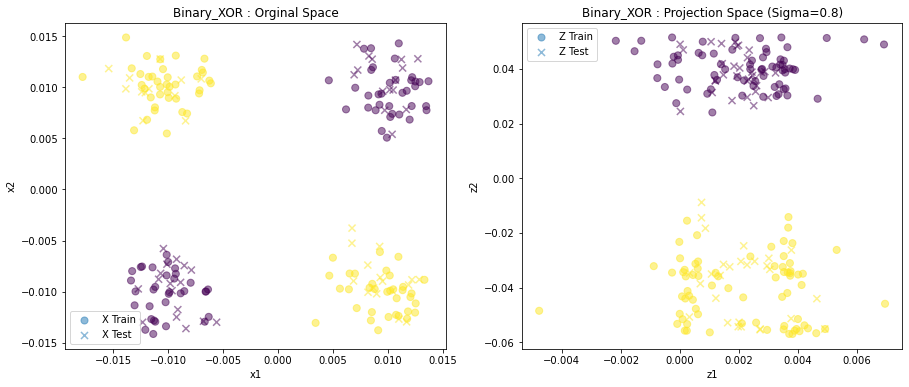

-----------------------------------------------------------------------------

---------------------------DataSet : Binary_XOR---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [1 2]


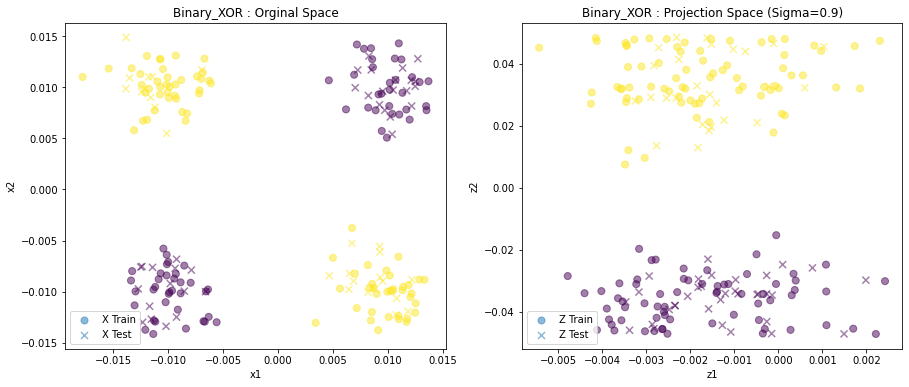

-----------------------------------------------------------------------------

---------------------------DataSet : Binary_XOR---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [1 2]


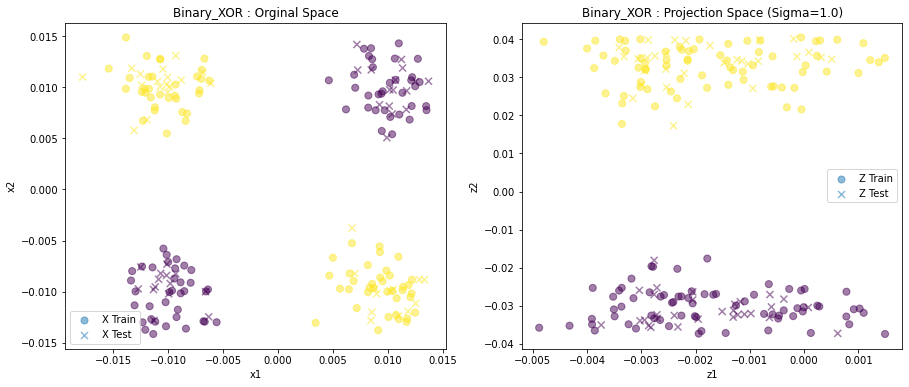

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rectangles---------------------------
x_train.shape = (252, 2)
y_train.shape = (252,)
m = 252
n = 2
x_test.shape = (109, 2)
y_test.shape = (109,)
m_test = 109
c = 3
y_unique = [1 2 3]


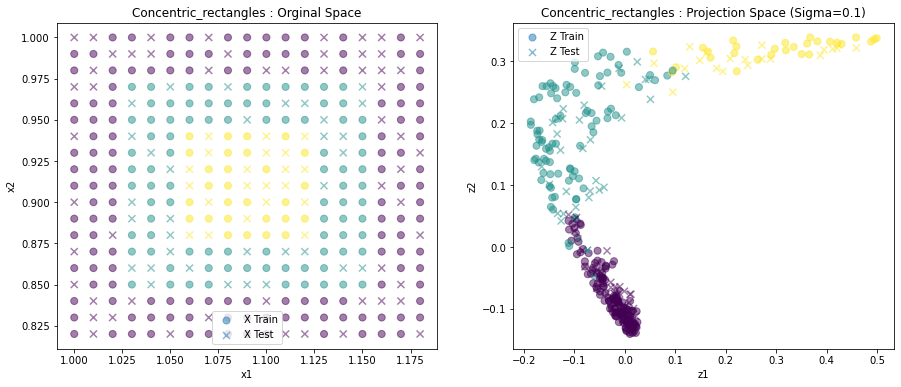

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rectangles---------------------------
x_train.shape = (252, 2)
y_train.shape = (252,)
m = 252
n = 2
x_test.shape = (109, 2)
y_test.shape = (109,)
m_test = 109
c = 3
y_unique = [1 2 3]


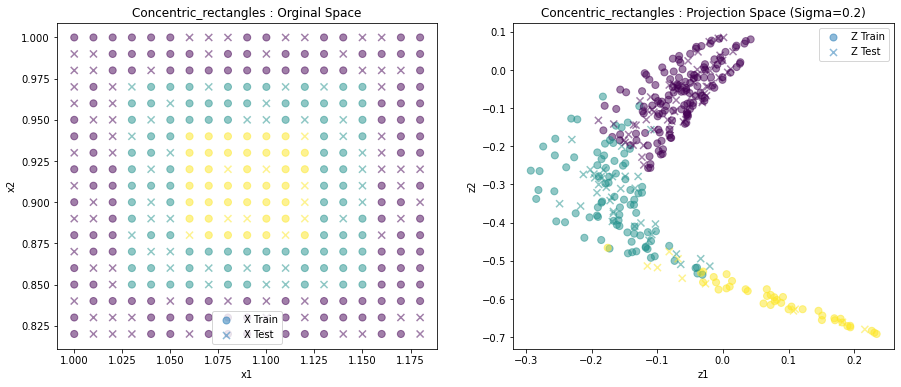

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rectangles---------------------------
x_train.shape = (252, 2)
y_train.shape = (252,)
m = 252
n = 2
x_test.shape = (109, 2)
y_test.shape = (109,)
m_test = 109
c = 3
y_unique = [1 2 3]


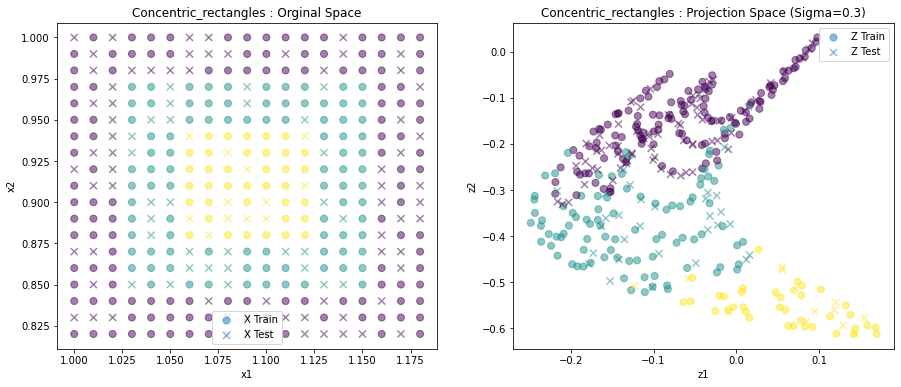

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rectangles---------------------------
x_train.shape = (252, 2)
y_train.shape = (252,)
m = 252
n = 2
x_test.shape = (109, 2)
y_test.shape = (109,)
m_test = 109
c = 3
y_unique = [1 2 3]


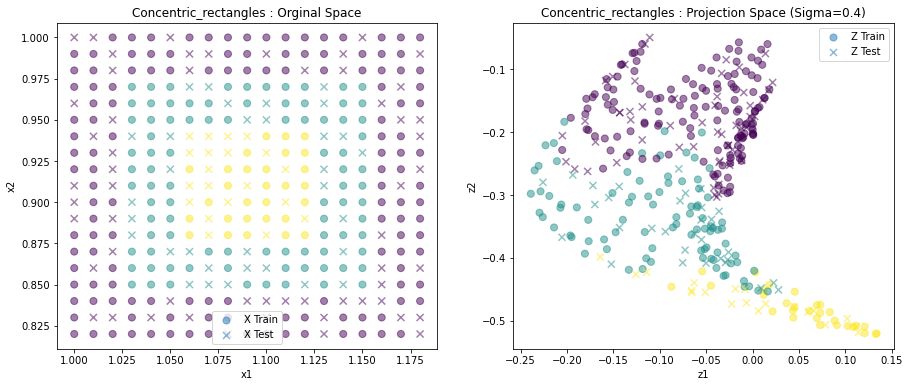

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rectangles---------------------------
x_train.shape = (252, 2)
y_train.shape = (252,)
m = 252
n = 2
x_test.shape = (109, 2)
y_test.shape = (109,)
m_test = 109
c = 3
y_unique = [1 2 3]


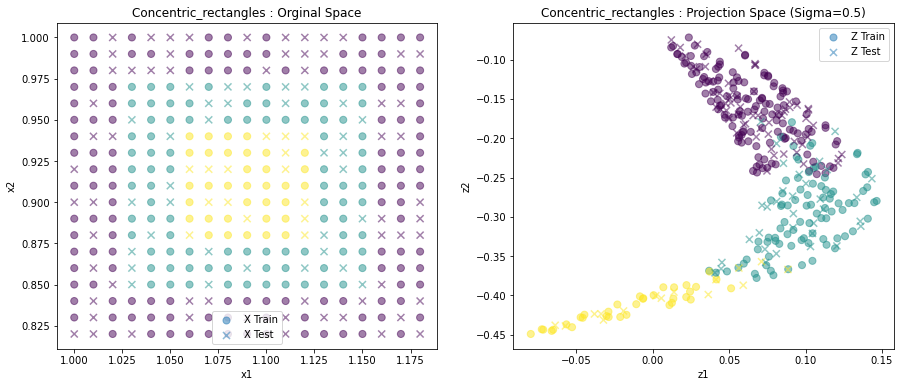

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rectangles---------------------------
x_train.shape = (252, 2)
y_train.shape = (252,)
m = 252
n = 2
x_test.shape = (109, 2)
y_test.shape = (109,)
m_test = 109
c = 3
y_unique = [1 2 3]


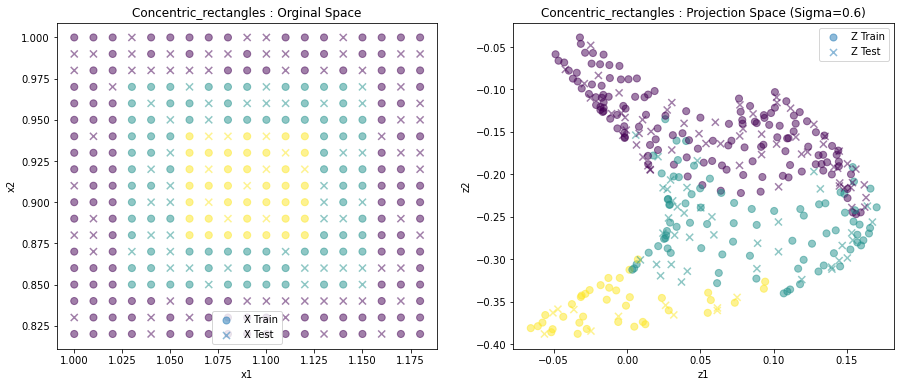

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rectangles---------------------------
x_train.shape = (252, 2)
y_train.shape = (252,)
m = 252
n = 2
x_test.shape = (109, 2)
y_test.shape = (109,)
m_test = 109
c = 3
y_unique = [1 2 3]


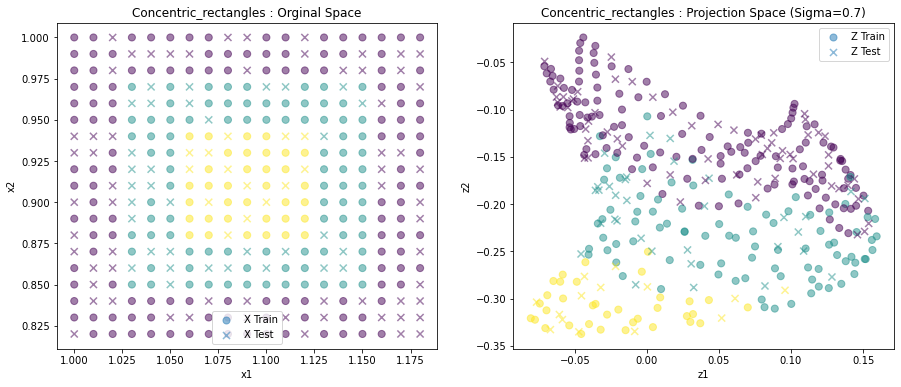

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rectangles---------------------------
x_train.shape = (252, 2)
y_train.shape = (252,)
m = 252
n = 2
x_test.shape = (109, 2)
y_test.shape = (109,)
m_test = 109
c = 3
y_unique = [1 2 3]


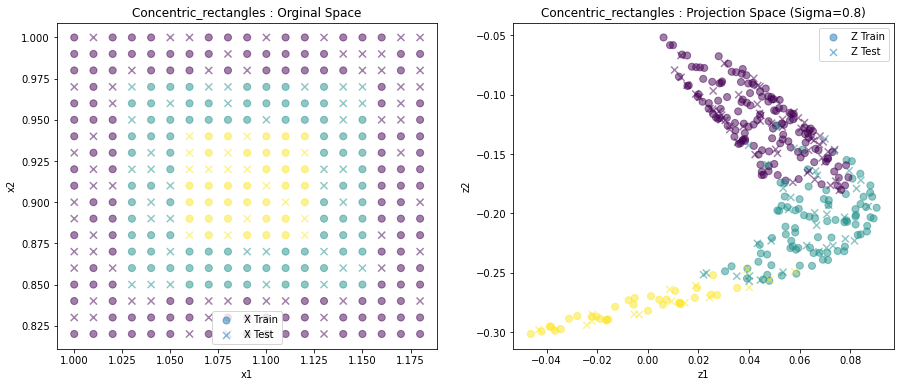

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rectangles---------------------------
x_train.shape = (252, 2)
y_train.shape = (252,)
m = 252
n = 2
x_test.shape = (109, 2)
y_test.shape = (109,)
m_test = 109
c = 3
y_unique = [1 2 3]


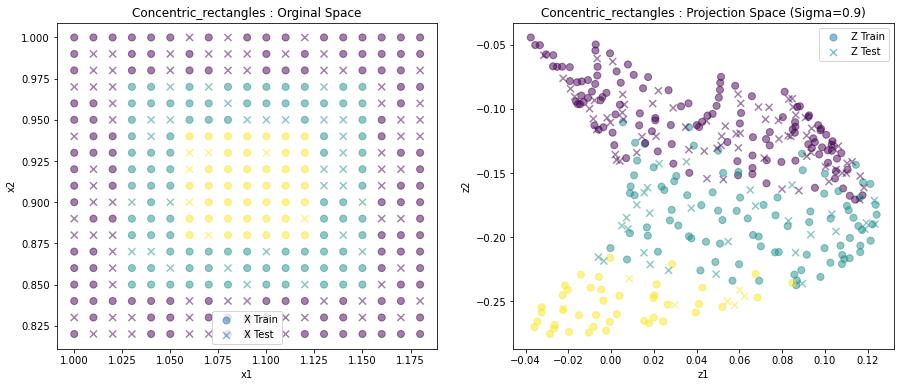

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rectangles---------------------------
x_train.shape = (252, 2)
y_train.shape = (252,)
m = 252
n = 2
x_test.shape = (109, 2)
y_test.shape = (109,)
m_test = 109
c = 3
y_unique = [1 2 3]


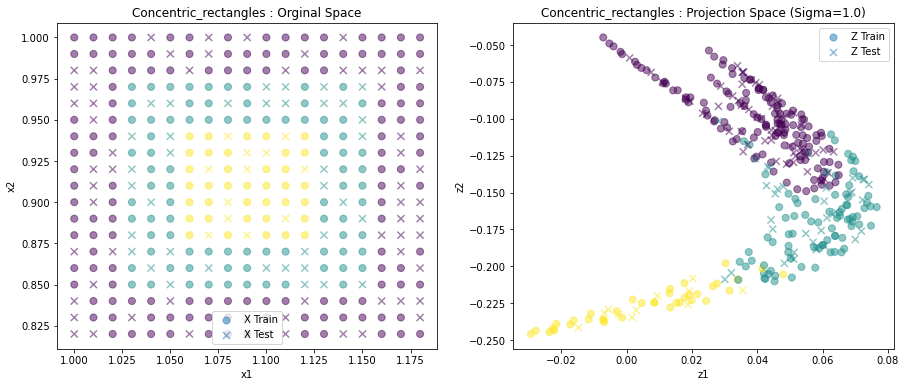

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rings---------------------------
x_train.shape = (219, 2)
y_train.shape = (219,)
m = 219
n = 2
x_test.shape = (94, 2)
y_test.shape = (94,)
m_test = 94
c = 2
y_unique = [1 2]


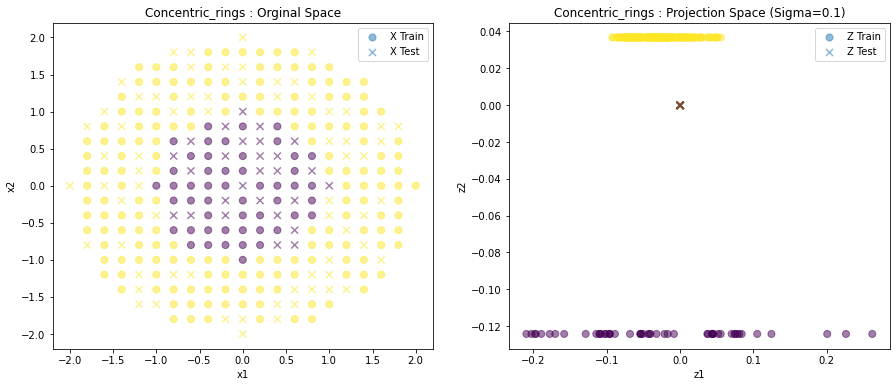

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rings---------------------------
x_train.shape = (219, 2)
y_train.shape = (219,)
m = 219
n = 2
x_test.shape = (94, 2)
y_test.shape = (94,)
m_test = 94
c = 2
y_unique = [1 2]


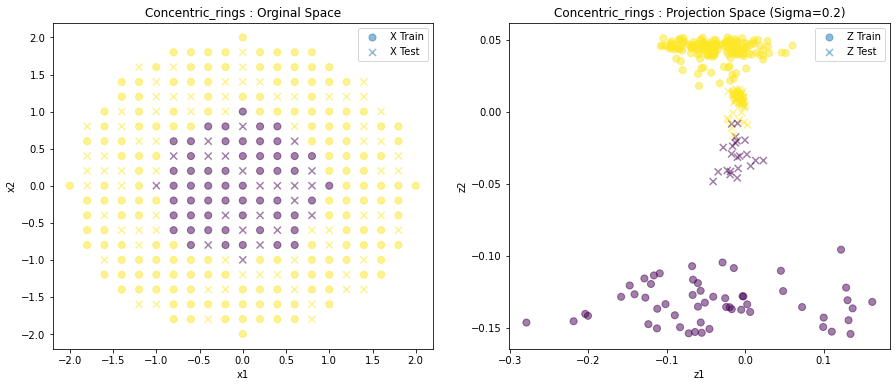

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rings---------------------------
x_train.shape = (219, 2)
y_train.shape = (219,)
m = 219
n = 2
x_test.shape = (94, 2)
y_test.shape = (94,)
m_test = 94
c = 2
y_unique = [1 2]


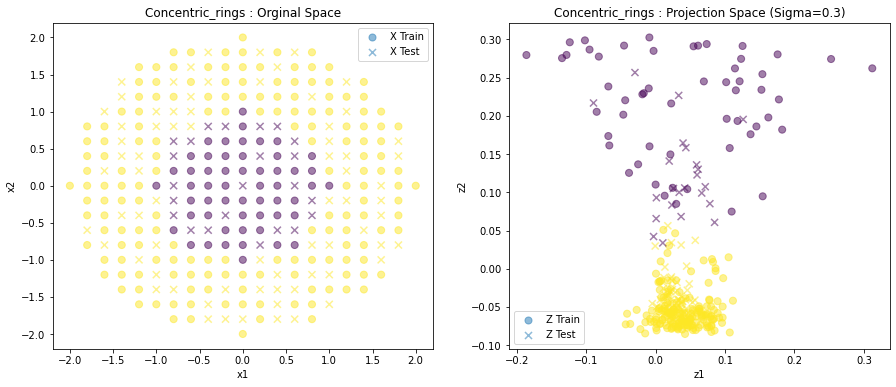

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rings---------------------------
x_train.shape = (219, 2)
y_train.shape = (219,)
m = 219
n = 2
x_test.shape = (94, 2)
y_test.shape = (94,)
m_test = 94
c = 2
y_unique = [1 2]


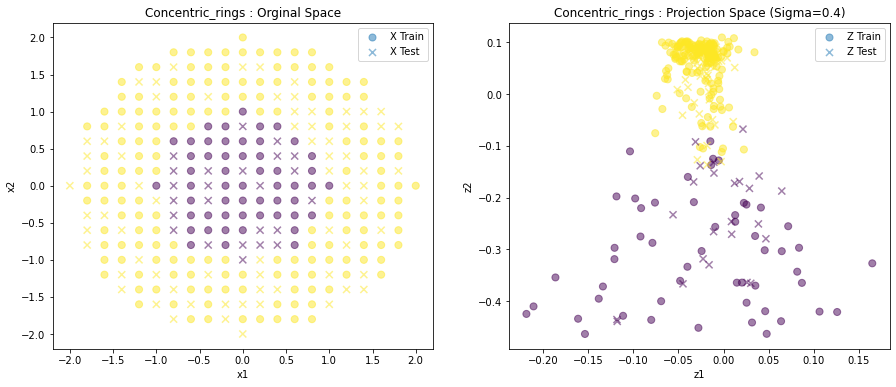

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rings---------------------------
x_train.shape = (219, 2)
y_train.shape = (219,)
m = 219
n = 2
x_test.shape = (94, 2)
y_test.shape = (94,)
m_test = 94
c = 2
y_unique = [1 2]


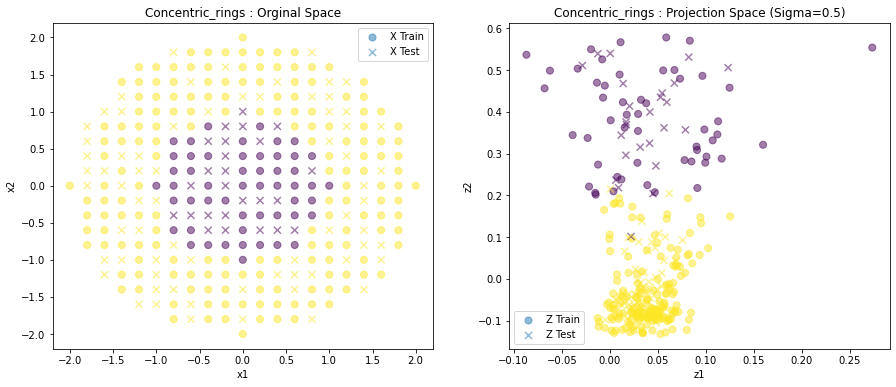

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rings---------------------------
x_train.shape = (219, 2)
y_train.shape = (219,)
m = 219
n = 2
x_test.shape = (94, 2)
y_test.shape = (94,)
m_test = 94
c = 2
y_unique = [1 2]


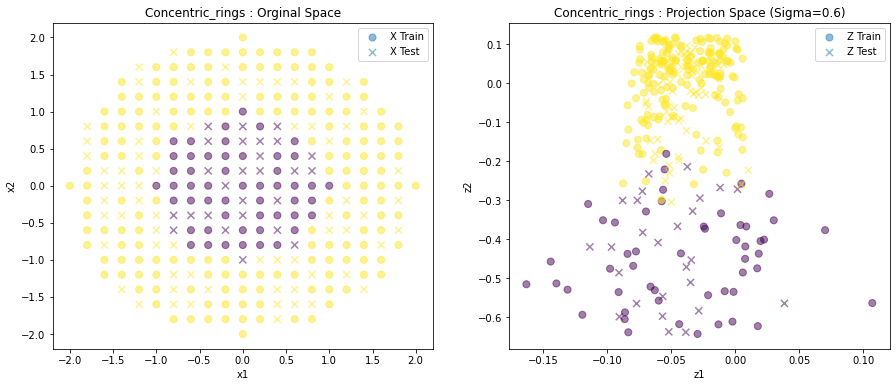

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rings---------------------------
x_train.shape = (219, 2)
y_train.shape = (219,)
m = 219
n = 2
x_test.shape = (94, 2)
y_test.shape = (94,)
m_test = 94
c = 2
y_unique = [1 2]


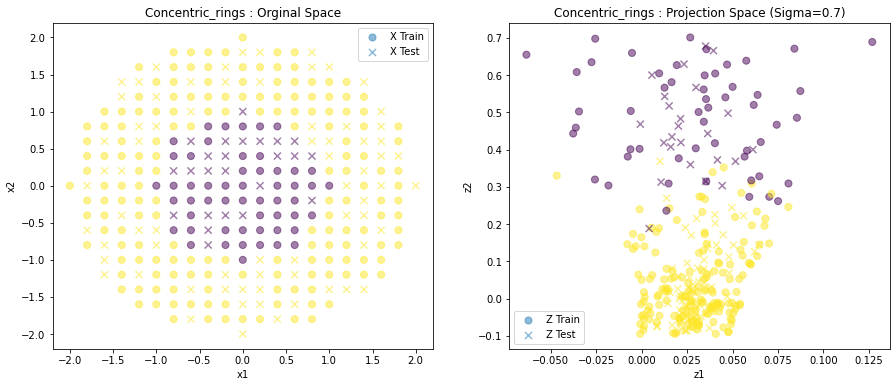

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rings---------------------------
x_train.shape = (219, 2)
y_train.shape = (219,)
m = 219
n = 2
x_test.shape = (94, 2)
y_test.shape = (94,)
m_test = 94
c = 2
y_unique = [1 2]


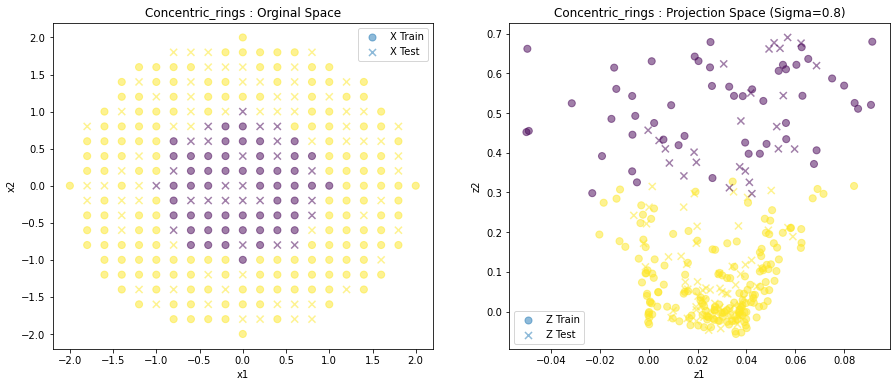

-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rings---------------------------
x_train.shape = (219, 2)
y_train.shape = (219,)
m = 219
n = 2
x_test.shape = (94, 2)
y_test.shape = (94,)
m_test = 94
c = 2
y_unique = [1 2]


-----------------------------------------------------------------------------

---------------------------DataSet : Concentric_rings---------------------------
x_train.shape = (219, 2)
y_train.shape = (219,)
m = 219
n = 2
x_test.shape = (94, 2)
y_test.shape = (94,)
m_test = 94
c = 2
y_unique = [1 2]


-----------------------------------------------------------------------------

---------------------------DataSet : Twomoons---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [-1  1]


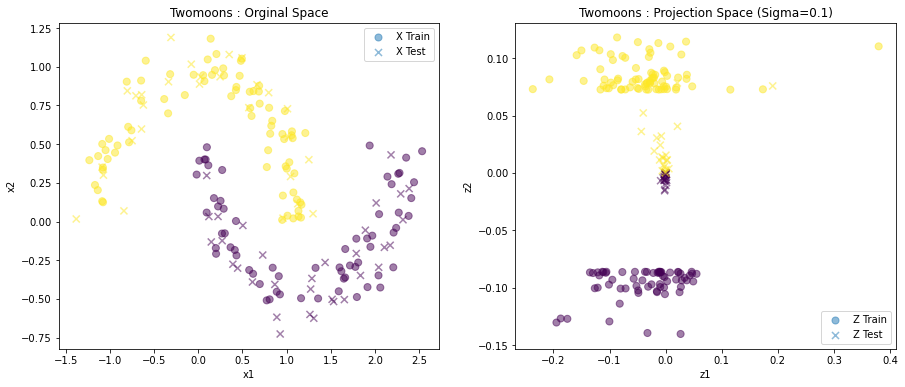

-----------------------------------------------------------------------------

---------------------------DataSet : Twomoons---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [-1  1]


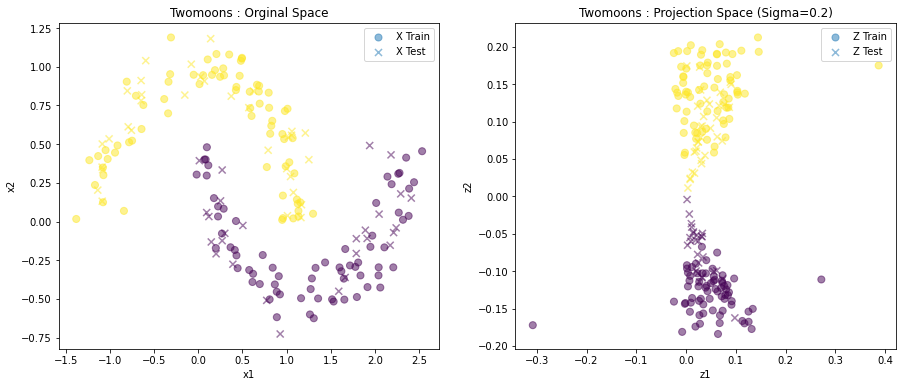

-----------------------------------------------------------------------------

---------------------------DataSet : Twomoons---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [-1  1]


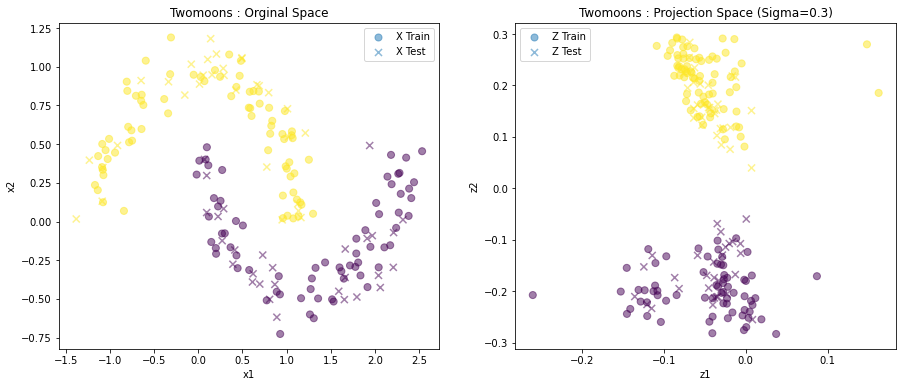

-----------------------------------------------------------------------------

---------------------------DataSet : Twomoons---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [-1  1]


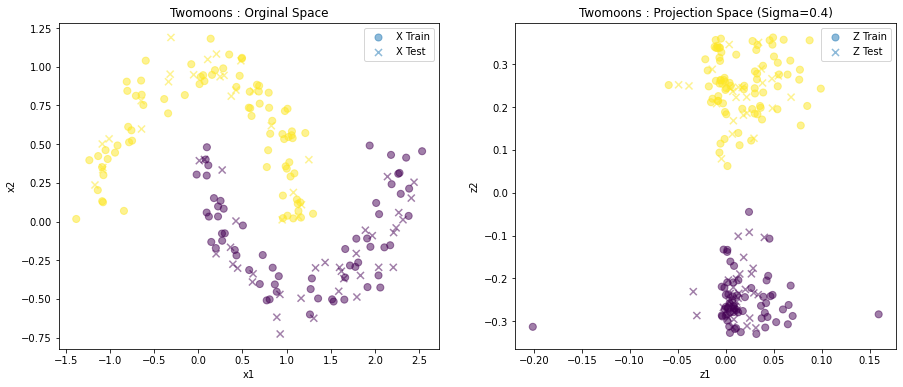

-----------------------------------------------------------------------------

---------------------------DataSet : Twomoons---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [-1  1]


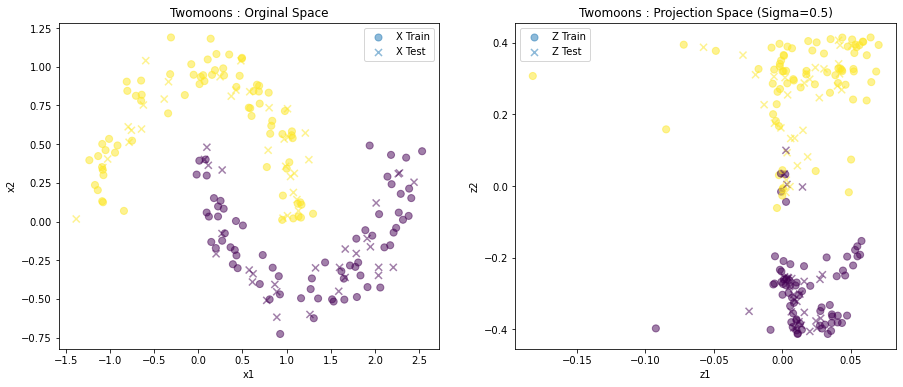

-----------------------------------------------------------------------------

---------------------------DataSet : Twomoons---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [-1  1]


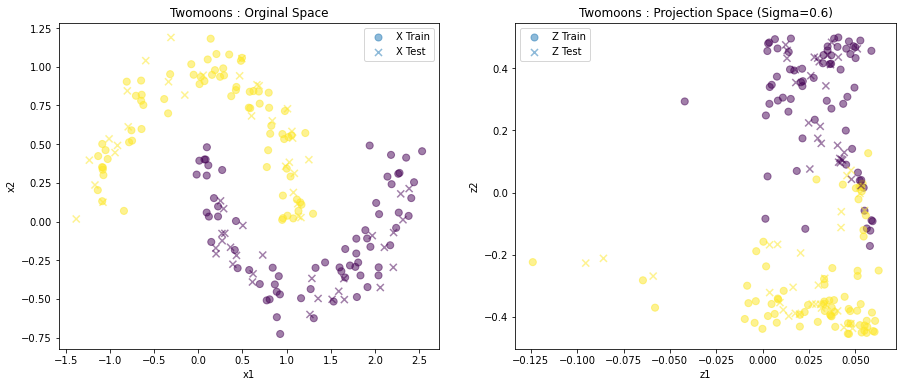

-----------------------------------------------------------------------------

---------------------------DataSet : Twomoons---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [-1  1]


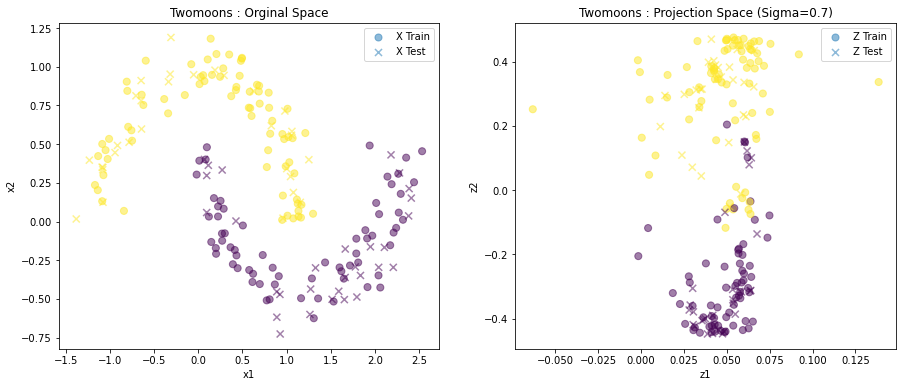

-----------------------------------------------------------------------------

---------------------------DataSet : Twomoons---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [-1  1]


-----------------------------------------------------------------------------

---------------------------DataSet : Twomoons---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [-1  1]


-----------------------------------------------------------------------------

---------------------------DataSet : Twomoons---------------------------
x_train.shape = (140, 2)
y_train.shape = (140,)
m = 140
n = 2
x_test.shape = (60, 2)
y_test.shape = (60,)
m_test = 60
c = 2
y_unique = [-1  1]


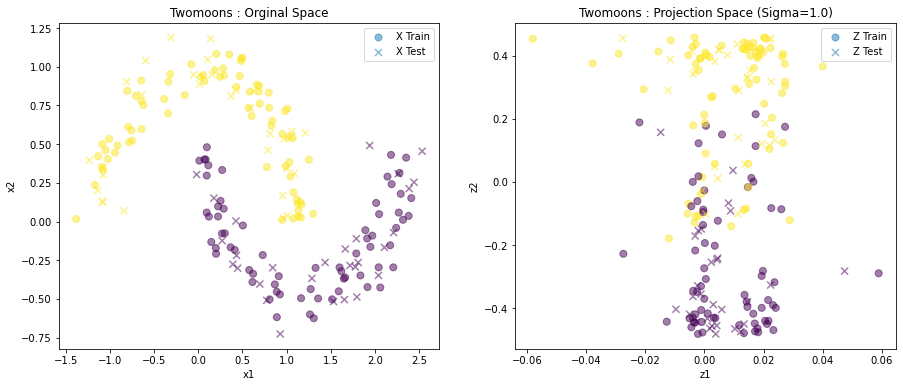

-----------------------------------------------------------------------------



In [172]:
for dataset, Sigma in datasets:
    
    # Load Data
    X_train, Y_train, m, X_test, Y_test, m_test, c, n, y_unique = load_data(set_type=dataset, test_size=0.3)
    
    # Apply KS-PCA
    Z, z = kspca(X_train, Y_train, X_test, Y_test, Sigma)
    
    # Prints & Plots
    print_dataset_specification(dataset, X_train, Y_train, m, X_test, Y_test, m_test, c, n, y_unique)   
    plot_scatter(X_train, Y_train, X_test, Y_test, Z, Y_train, z, Y_test, dataset, Sigma)
    
    print('-----------------------------------------------------------------------------')
    print('')